In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import trecs
from trecs.models import Homogenizer, ContentFiltering
from trecs.random import Generator
from trecs.metrics import HomogeneityMeasurement, RecSimilarity, InteractionSimilarity, AverageFeatureScoreRange

In [20]:
num_users = 100
num_items = 1000
num_attrs = 20

startup_iters = 1
sim_iters = 190
# simpler way to pass common arguments
init_params = {
    "num_items_per_iter": 100
}

run_params = {
    "train_between_steps": True,
    "random_items_per_iter": 0,
    "vary_random_items_per_iter": False,
    "timesteps": sim_iters,
    "repeated_items": False
}

pairs = [np.random.choice(num_users, 2, replace=False) for _ in range(800)]

In [21]:
cf=ContentFiltering(**init_params)
hm=Homogenizer()

In [22]:
hm.add_metrics(InteractionSimilarity(pairs))

In [23]:
hm.run(**run_params)


100%|██████████| 190/190 [00:07<00:00, 24.21it/s]


In [24]:
results = hm.get_measurements()

print("Results of the simulation:")
pd.DataFrame(results)

Results of the simulation:


,mse,interaction_similarity,timesteps
0,None,None,0
1,124.8617149917703,0.11750000000000008,1
2,167.44662813194793,0.05416666666666675,2
3,186.1683777796658,0.047500000000000035,3
4,195.65129941961234,0.0505119047619049,4
...,...,...,...
186,1.442206027463954,0.8630224319460963,186
187,1.442206027463954,0.863435503046318,187
188,1.442206027463954,0.86411552411078,188
189,1.442206027463954,0.8650173660298578,189


Text(0, 0.5, 'Interaction Similarity (Random Pairs)')

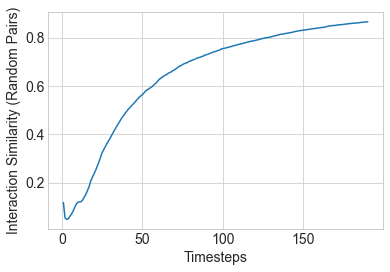

In [30]:
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 14})
plt.plot(results['timesteps'], results['interaction_similarity'])
plt.xlabel("Timesteps")
plt.ylabel("Interaction Similarity (Random Pairs)")
